# Beam on Winkler Foundation Exact Solution and Finite Element Approximation

## Requirements
sympy  
numpy  
scipy  
matplotlib  

## Purpose
This notebook does the following:

1. Derive the 4th-order Ordinary Differential Equation (ODE) governing the response of a beam on elastic foundation
2. Define the solution to the ODE
3. Develop a solution strategy to solve for the coefficients to satsify boundary conditions
4. Develop equations for the stiffness matrix of an Euler-Bernoulli beam using Hermite cubic polynomial shape functions
5. Develop equations for the stiffness matrix of the p-y "springs" attached to the beam
6. Approximate the solution using the finite element method

## Winkler Assumption

The Winkler assumption is that a pressure develops when a beam displaces into an elastic medium, and that the pressure is proportional to the displacement of the beam, and independent of the stresses at other points on the beam. It's important to remember that the Winkler assumption is mechanically incorrect, but it's useful. If you analyze a beam using continuum methods, the pressure is not actually proportional to displacement. As an example, a rigid beam resting on an elastic halfspace has infinite pressure at the ends and smaller pressures in the middle, even though the displacements of the beam are identical everywhere. The solution is nevertheless useful, and forms the basis for laterally loaded pile analyses using programs like LPile.  

## Definition of Terms  

$EI$ = flexural stiffness of beam units = $\left(FL^2\right)$  
$k_y^i$ = subgrade reaction stiffness intensity $\left(F/L/L\right)$  
$\beta = \sqrt[^4]{\frac{k_y^i}{4EI}}$ = Winkler stiffness parameter $\left(L^{-1}\right)$  
$p$ = line load acting on beam  
$V$ = shear in beam  
$M$ = bending moment in beam  
$\phi$ = curvature of beam  
$\theta$ = rotation of beam  
$u$ = beam displacement  
$z$ = length dimension along beam axis  
$H$ = length of beam
<br>
Note: The units for $k_y^i$ are often a source of confusion. I specify them as $\left(F/L/L\right)$ here because the stiffness intensity relates the line load mobilized against the beam to the beam displacement. So it's like a line load with units of $F/L$ will be mobilized for a displacement with units of $L$. However, the units are often presented as $\left(F/L^2\right)$.  

## Governing Differential Equation  

An Euler-Bernoulli beam is defined by the following relationships in integral form:  

$V = \int{p}$  
$M = \int{V} = EI\phi$  
$\theta = \int{\phi}$  
$u = \int{\theta}$  

The equivalent expression in differential form are:  

$\theta = \frac{du}{dz}$  
$\phi = \frac{d^2u}{dz^2}$  
$M = EI\frac{d^2u}{dz^2}$  
$V = EI\frac{d^3u}{dz^3}$  
$p = EI\frac{d^4u}{dz^4}$  

The Winkler assumption give us:

$p = -k_y^iu$  

Equating the expressions for p from beam theory with that for the Winkler assumption produces the governing differential equation:  

$EI\frac{d^4u}{dz^4} + k_y^iu = 0$  

## Solution of Governing Differential Equation  

Assuming that $EI$ and $k_y^i$ are constants, the analytical solution for displacement and derivatives (computed in the cell below using Sympy) takes the form:  

$u = C_1e^{-\beta z}cos\left(\beta z\right) + C_2e^{-\beta z}sin\left(\beta z\right) + C_3e^{\beta z}cos\left(\beta z\right) + C_4e^{\beta z}cos\left(\beta z\right)$

$\frac{du}{dz} = - C_{1} \beta e^{- \beta x} \sin{\left(\beta x \right)} - C_{1} \beta e^{- \beta x} \cos{\left(\beta x \right)} - C_{2} \beta e^{- \beta x} \sin{\left(\beta x \right)} + C_{2} \beta e^{- \beta x} \cos{\left(\beta x \right)} - C_{3} \beta e^{\beta x} \sin{\left(\beta x \right)} + C_{3} \beta e^{\beta x} \cos{\left(\beta x \right)} + C_{4} \beta e^{\beta x} \sin{\left(\beta x \right)} + C_{4} \beta e^{\beta x} \cos{\left(\beta x \right)}$  

$\frac{d^2u}{dz^2} = 2 \beta^{2} \left(C_{1} e^{- \beta x} \sin{\left(\beta x \right)} - C_{2} e^{- \beta x} \cos{\left(\beta x \right)} - C_{3} e^{\beta x} \sin{\left(\beta x \right)} + C_{4} e^{\beta x} \cos{\left(\beta x \right)}\right)$  

$\frac{d^3u}{dz^3} = 2 \beta^{3} \left(- C_{1} e^{- \beta x} \sin{\left(\beta x \right)} + C_{1} e^{- \beta x} \cos{\left(\beta x \right)} + C_{2} e^{- \beta x} \sin{\left(\beta x \right)} + C_{2} e^{- \beta x} \cos{\left(\beta x \right)} - C_{3} e^{\beta x} \sin{\left(\beta x \right)} - C_{3} e^{\beta x} \cos{\left(\beta x \right)} - C_{4} e^{\beta x} \sin{\left(\beta x \right)} + C_{4} e^{\beta x} \cos{\left(\beta x \right)}\right)$  

$\frac{d^4u}{dz^4} = - 4 \beta^{4} \left(C_{1} e^{- \beta x} \cos{\left(\beta x \right)} + C_{2} e^{- \beta x} \sin{\left(\beta x \right)} + C_{3} e^{\beta x} \cos{\left(\beta x \right)} + C_{4} e^{\beta x} \sin{\left(\beta x \right)}\right)$  

The C's are coefficients that must be solved to satisfy essential boundary conditions, generally specified at the ends of the beam (i.e., at $z=0$ and at $z=L$).  

In [15]:
import sympy as sym

x = sym.Symbol('x')
beta = sym.Symbol('beta')
C1 = sym.Symbol('C1')
C2 = sym.Symbol('C2')
C3 = sym.Symbol('C3')
C4 = sym.Symbol('C4')
sym.init_printing()
f = C1*sym.exp(-beta*x)*sym.cos(beta*x) + C2*sym.exp(-beta*x)*sym.sin(beta*x) + C3*sym.exp(beta*x)*sym.cos(beta*x) + C4*sym.exp(beta*x)*sym.sin(beta*x)
X = sym.diff(f,x,4)
sym.print_latex(X)
X

- 4 \beta^{4} \left(C_{1} e^{- \beta x} \cos{\left(\beta x \right)} + C_{2} e^{- \beta x} \sin{\left(\beta x \right)} + C_{3} e^{\beta x} \cos{\left(\beta x \right)} + C_{4} e^{\beta x} \sin{\left(\beta x \right)}\right)


In [10]:
# Function to return displacement or its derivatives, up to the 4th derivative
def get_u(x,beta,C,order):
    bx = beta*x
    C1 = C[0]
    C2 = C[1]
    C3 = C[2]
    C4 = C[3]
    if(order==0):
        output = C1*np.exp(-bx)*np.cos(bx)
        output += C2*np.exp(-bx)*np.sin(bx)
        output += C3*np.exp(bx)*np.cos(bx)
        output += C4*np.exp(bx)*np.sin(bx)
    elif(order==1):
        output = C1*beta*(-np.exp(-bx)*np.sin(bx)-np.exp(-bx)*np.cos(bx))
        output += C2*beta*(-np.exp(-bx)*np.sin(bx)+np.exp(-bx)*np.cos(bx))
        output += C3*beta*(-np.exp(bx)*np.sin(bx)+np.exp(bx)*np.cos(bx))
        output += C4*beta*(np.exp(bx)*np.sin(bx)+np.exp(bx)*np.cos(bx))
    elif(order==2):
        output = 2*beta**2*C1*np.exp(-bx)*np.sin(bx)
        output += -2*beta**2*C2*np.exp(-bx)*np.cos(bx)
        output += -2*beta**2*C3*np.exp(bx)*np.sin(bx)
        output += 2*beta**2*C4*np.exp(bx)*np.cos(bx)
    elif(order==3):
        output = 2*C1*beta**3*(-np.exp(-bx)*np.sin(bx)+np.exp(-bx)*np.cos(bx))
        output += 2*C2*beta**3*(np.exp(-bx)*np.sin(bx)+np.exp(-bx)*np.cos(bx))
        output += 2*C3*beta**3*(-np.exp(bx)*np.sin(bx)-np.exp(bx)*np.cos(bx))
        output += 2*C4*beta**3*(-np.exp(bx)*np.sin(bx)+np.exp(bx)*np.cos(bx))
    elif(order==4):
        output = -4*beta**4*C1*np.exp(-bx)*np.cos(bx)
        output += -4*beta**4*C2*np.exp(-bx)*np.sin(bx)
        output += -4*beta**4*C3*np.exp(bx)*np.cos(bx)
        output += -4*beta**4*C4*np.exp(bx)*np.sin(bx)
    else:
        output = 'Invalid order in u(x,beta,C,order)'
    return output

# Function to solve for C's by setting up a matrix and vector based on specified boundary conditions
def get_C(BCs,beta):
    Mat = np.zeros((4,4))
    Vec = np.zeros(4)
    for i in range(4):
        x = BCs[i][2]
        bx = beta*x
        if(BCs[i][0] == 0):
            Mat[i][0] = np.exp(-bx)*np.cos(bx)
            Mat[i][1] = np.exp(-bx)*np.sin(bx)
            Mat[i][2] = np.exp(bx)*np.cos(bx)
            Mat[i][3] = np.exp(bx)*np.sin(bx)
        elif(BCs[i][0] == 1):
            Mat[i][0] = beta*(-np.exp(-bx)*np.sin(bx)-np.exp(-bx)*np.cos(bx))
            Mat[i][1] = beta*(-np.exp(-bx)*np.sin(bx)+np.exp(-bx)*np.cos(bx))
            Mat[i][2] = beta*(-np.exp(bx)*np.sin(bx)+np.exp(bx)*np.cos(bx))
            Mat[i][3] = beta*(np.exp(bx)*np.sin(bx)+np.exp(bx)*np.cos(bx))
        elif(BCs[i][0] == 2):
            Mat[i][0] = 2*beta**2*np.exp(-bx)*np.sin(bx)
            Mat[i][1] = -2*beta**2*np.exp(-bx)*np.cos(bx)
            Mat[i][2] = -2*beta**2*np.exp(bx)*np.sin(bx)
            Mat[i][3] = 2*beta**2*np.exp(bx)*np.cos(bx)
        elif(BCs[i][0] == 3):
            Mat[i][0] = 2*beta**3*(-np.exp(-bx)*np.sin(bx)+np.exp(-bx)*np.cos(bx))
            Mat[i][1] = 2*beta**3*(np.exp(-bx)*np.sin(bx)+np.exp(-bx)*np.cos(bx))
            Mat[i][2] = 2*beta**3*(-np.exp(bx)*np.sin(bx)-np.exp(bx)*np.cos(bx))
            Mat[i][3] = 2*beta**3*(-np.exp(bx)*np.sin(bx)+np.exp(bx)*np.cos(bx))
        else:
            return('Invalid order in get_C(BCs,beta)')
        Vec[i] = BCs[i][1]
    return np.linalg.solve(Mat,Vec)

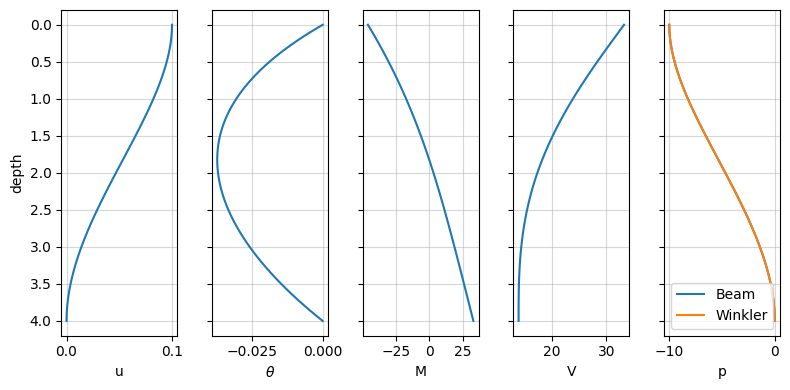

In [197]:
import numpy as np
import matplotlib.pyplot as plt

'''Boundary conditions. Specify numpy array with four entries; one for each BC. 
First element indicates BC type (0 = disp, 1 = slope, 2 = moment, 3 = shear)
Second element indicates BC value
Third element indicates BC position
e.g. [0, 0.1, 0.0] specifies displacement = 0 at z=0.
     [1, 0.0, H] specifies rotation = 0 at z=H.
'''

H = 4
EI = 1000
kyi = 100
beta = (kyi/(4*EI))**0.25
BCs = np.asarray([
    [0,0.1,0.0],
    [1,0.0,0.0],
    [0,0.0,H],
    [1,0.0,H]    
])
C = get_C(BCs,beta)
x = np.linspace(0,H,100)
u = get_u(x,beta,C,0)
theta = get_u(x,beta,C,1)
M = EI*get_u(x,beta,C,2)
V = EI*get_u(x,beta,C,3)
p = EI*get_u(x,beta,C,4)
fig, ax = plt.subplots(ncols=5,sharey='row',figsize=(8,4))
ax[0].plot(u,x)
ax[1].plot(theta,x)
ax[2].plot(M,x)
ax[3].plot(V,x)
ax[4].plot(p,x,label='Beam')
ax[4].plot(-kyi*u,x,label='Winkler')
ax[4].legend()
ax[0].invert_yaxis()
ax[0].set_ylabel('depth')
ax[0].set_xlabel('u')
ax[1].set_xlabel(r'$\theta$')
ax[2].set_xlabel('M')
ax[3].set_xlabel('V')
ax[4].set_xlabel('p')
for a in ax:
    a.grid(True, alpha=0.5)
plt.tight_layout()

# Finite Element Approximate Solution  

The finite element approximation requires definition of a stiffness matrix for the basic element, which consists of an Euler-Bernoulli beam supported by two Winkler springs, as illustrated below. Nodes 1 and 2 have two degrees of freedom; one for horizontal displacement and one for rotation. Nodes 3 and 4 are assumed to be fixed (i.e., no free-field ground displacement).

<img src='WinklerElement.png' alt='Winkler Element' style='height:200px;'>

The beam stiffness matrix is developed using Hermite cubic polynomial shape functions. These shape functions do not match the analytical solution for constant $k_y^i$ and $EI$, but are reasonably accurate when an adequate number of elements is utilized, and/or when the wall is stiff relative to the soil.

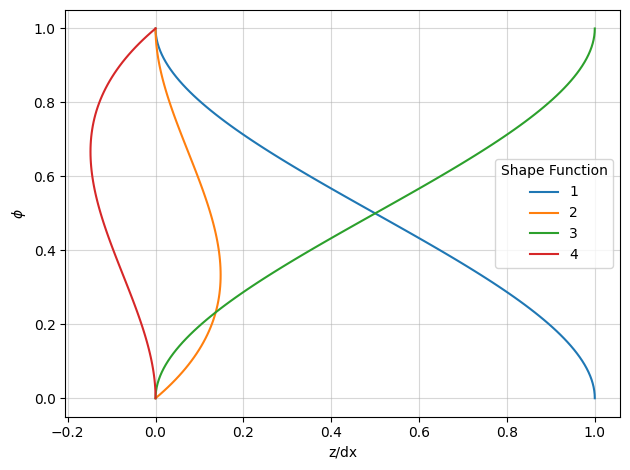

In [198]:
import numpy as np
import matplotlib.pyplot as plt

dx = 1
N = 100
z = np.linspace(0,dx,N)
phi = np.zeros((4,N))
phi[0] = (1-z/dx)**2*(1+2*z/dx)
phi[1] = z*(1-z/dx)**2
phi[2] = (z/dx)**2*(3-2*z/dx)
phi[3] = -z**2/dx*(1-z/dx)

fig, ax = plt.subplots()
for i in range(4):
    ax.plot(phi[i],z,label=str(i+1))
ax.legend(title='Shape Function')
ax.set_ylabel(r'$\phi$')
ax.set_xlabel('z/dx')
ax.grid(True,alpha=0.5)
plt.tight_layout()

## Beam Stiffness Matrix

The beam stiffness matrix is computed as $K_{ij} = \int_0^H EI\frac{d^2\phi_i}{dz^2}\frac{d^2\phi_j}{dz^2}dz$. Solving derivatives using Sympy in the cell below and factoring out $EI/H^3$, we obtain the following:  

<br>

$\begin{Bmatrix}
F_1\\
M_1\\
F_2\\
M_2
\end{Bmatrix}$ = $\frac{EI}{H^3}$
$\begin{bmatrix}
12 & 6H & -12 & 6H\\
6H & 4H^2 & -6H & 2H^2\\
-12 & -6H & 12 & -6H\\
6L & 2H^2 & -6H & 4H^2
\end{bmatrix}$
$\begin{Bmatrix}
u_1\\
\theta_1\\
u_2\\
\theta_2
\end{Bmatrix}$

In [201]:
z = sym.Symbol('z')
H = sym.Symbol('H')
EI = sym.Symbol('EI')
phi1 = (1-z/H)*(1-z/H)*(1+2*z/H)
phi2 = z*(1-z/H)*(1-z/H)
phi3 = (z/H)*(z/H)*(3-2*z/H)
phi4 = -z*z/H*(1-z/H)

K11 = EI*sym.integrate(sym.diff(phi1,z,2)*sym.diff(phi1,z,2),(z,0,H))
K12 = EI*sym.integrate(sym.diff(phi1,z,2)*sym.diff(phi2,z,2),(z,0,H))
K13 = EI*sym.integrate(sym.diff(phi1,z,2)*sym.diff(phi3,z,2),(z,0,H))
K14 = EI*sym.integrate(sym.diff(phi1,z,2)*sym.diff(phi4,z,2),(z,0,H))

K21 = EI*sym.integrate(sym.diff(phi2,z,2)*sym.diff(phi1,z,2),(z,0,H))
K22 = EI*sym.integrate(sym.diff(phi2,z,2)*sym.diff(phi2,z,2),(z,0,H))
K23 = EI*sym.integrate(sym.diff(phi2,z,2)*sym.diff(phi3,z,2),(z,0,H))
K24 = EI*sym.integrate(sym.diff(phi2,z,2)*sym.diff(phi4,z,2),(z,0,H))

K31 = EI*sym.integrate(sym.diff(phi3,z,2)*sym.diff(phi1,z,2),(z,0,H))
K32 = EI*sym.integrate(sym.diff(phi3,z,2)*sym.diff(phi2,z,2),(z,0,H))
K33 = EI*sym.integrate(sym.diff(phi3,z,2)*sym.diff(phi3,z,2),(z,0,H))
K34 = EI*sym.integrate(sym.diff(phi3,z,2)*sym.diff(phi4,z,2),(z,0,H))

K41 = EI*sym.integrate(sym.diff(phi4,z,2)*sym.diff(phi1,z,2),(z,0,H))
K42 = EI*sym.integrate(sym.diff(phi4,z,2)*sym.diff(phi2,z,2),(z,0,H))
K43 = EI*EI*sym.integrate(sym.diff(phi4,z,2)*sym.diff(phi3,z,2),(z,0,H))
K44 = EI*sym.integrate(sym.diff(phi4,z,2)*sym.diff(phi4,z,2),(z,0,H))

sym.Matrix([[K11,K12,K13,K14],[K21,K22,K23,K24],[K31,K32,K33,K34],[K41,K42,K43,K44]])

⎡ 12⋅EI    6⋅EI   -12⋅EI    6⋅EI ⎤
⎢ ─────    ────   ───────   ──── ⎥
⎢    3       2        3       2  ⎥
⎢   H       H        H       H   ⎥
⎢                                ⎥
⎢ 6⋅EI     4⋅EI   -6⋅EI     2⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       H        2       H   ⎥
⎢  H                H            ⎥
⎢                                ⎥
⎢-12⋅EI   -6⋅EI    12⋅EI   -6⋅EI ⎥
⎢───────  ──────   ─────   ──────⎥
⎢    3       2        3       2  ⎥
⎢   H       H        H       H   ⎥
⎢                                ⎥
⎢                      2         ⎥
⎢ 6⋅EI     2⋅EI   -6⋅EI     4⋅EI ⎥
⎢ ────     ────   ───────   ──── ⎥
⎢   2       H         2      H   ⎥
⎣  H                 H           ⎦

## Winkler Stiffness Matrix  

The stiffness intensity $k_y^i$ has units of $F/L/L$, and the intensity must be divided between the two p-y elements. Using the tributary length method, the stiffness of each p-y element is $k_y^i dz/2$. Noting that forces are positive from left-to-right, we obtain the following stiffness matrix:  

$\begin{Bmatrix}
F_1\\
F_2\\
F_3\\
F_4
\end{Bmatrix}$ = $\frac{k_y^i dz}{2}$
$\begin{bmatrix}
1 & 0 & -1 & 0\\
0 & 1 & 0 & -1\\
-1 & 0 & 1 & 0\\
0 & -1 & 0 & 1
\end{bmatrix}$
$\begin{Bmatrix}
u_1\\
u_2\\
u_3\\
u_4
\end{Bmatrix}$  

Noting that $u_3$ = $u_4$ = 0, we can condense out the bottom two rows and right two columns. The resulting equation is:

$\begin{Bmatrix}
F_1\\
F_2
\end{Bmatrix}$ = $\frac{k_y^i dz}{2}$
$\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}$
$\begin{Bmatrix}
u_1\\
u_2
\end{Bmatrix}$  

## Combined Stiffness Matrix

We can now combine the two stiffness matrices into a single matrix by combining contributions to nodes 1 and 2:  

$\begin{Bmatrix}
F_1\\
M_1\\
F_2\\
M_2
\end{Bmatrix}$ = 
$\begin{bmatrix}
12\frac{EI}{H^3} + \frac{k_y^i dz}{2} & 6\frac{EI}{H^2} & -12\frac{EI}{H^3} & 6\frac{EI}{H^2}\\
6\frac{EI}{H^2} & 4\frac{EI}{H} & -6\frac{EI}{H^2} & 2\frac{EI}{H} \\
-12\frac{EI}{H^3} & -6\frac{EI}{H^2} & 12\frac{EI}{H^3} + \frac{k_y^i dz}{2} & -6\frac{EI}{H^2}\\
6\frac{EI}{H^2} & 2\frac{EI}{H} & -6\frac{EI}{H^2} & 4\frac{EI}{H}
\end{bmatrix}$
$\begin{Bmatrix}
u_1\\
\theta_1\\
u_2\\
\theta_2
\end{Bmatrix}$

In [202]:
# Element stiffness matrix equations
# Individual equations are provided for the beam-column matrix and for the p-y matrix because they are useful later for computing internal forces
def get_Kbeam(EI,H):
    Kbeam = EI/H**3*np.asarray([
        [12, 6*H, -12, 6*H],
        [6*H, 4*H**2, -6*H, 2*H**2],
        [-12, -6*H, 12, -6*H],
        [6*H, 2*H**2, -6*H, 4*H**2]        
    ])
    return Kbeam

def get_Kpy(kyi,H):
    Kpy = kyi*H/2.0*np.asarray([
        [1.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, 0.0]
    ])
    return Kpy
    
def get_Kele(EI,kpy,H):
    Kele = get_Kbeam(EI,H) + get_Kpy(kyi,H)
    return Kele

## Assembling global stiffness matrix from element stiffness matrices

After forming the stiffness matrix for each element, they must be combined into a global stiffness matrix based on nodal connectivity. For simplicity we herein assume that the nodes are numbered in order such that the beam column connects 1 to 2, 2 to 3, and so forth, and also that $dz$, $EI$, and $k_y^i$ are constant. We later provide an example with variable $EI$ and $k_y^i$ values. The approach adopted here is to initialize the global stiffness matrix $K_{global}$ to zeros, and add the element stiffness matrices to it in a loop over all elements.

In [205]:
# Now solve using finite element method

# Input parameters
Nele = 10                         # Number of beam elements
H = 4.0                           # Total length of beam
EI = 1000                         # Flexural stiffness of beam
kyi = 100                         # Winkler stiffness intensity
dx2 = H/Nele                      # Element length
x2 = np.linspace(0,H,Nele+1)      # Array of nodal locations
x2_ele = np.zeros(2*Nele)
x2_ele[0::2] = x2[0:Nele]
x2_ele[1::2] = x2[1:Nele+1]
ele_sign = np.zeros(2*Nele)
ele_sign[0::2] = 1
ele_sign[1::2] = -1
# Boundary conditions array. This array is a bit different than for the analytical solution.
'''Boundary conditions. Specify numpy array with four entries; one for each BC. 
First element indicates BC type (0 = disp, 1 = slope, 2 = moment, 3 = shear)
Second element indicates BC value
Third element indicates node number
e.g. [0, 0.1, 0.0] specifies displacement = 0 at z=0.
     [1, 0.0, H] specifies rotation = 0 at z=L.
'''

Kglobal = np.zeros((2*(Nele+1),2*(Nele+1)))  
I = 0
for k in range(Nele):
    Kele = get_Kele(EI,kyi,dx2)
    for i in range(4):
        for j in range(4):
            Kglobal[i+I][j+I] += Kele[i][j]
    I+=2

## Solving the System of Equations

Before solving the system of equations, a force array is constructed from the imposed force boundary conditions, and a displacement array is constructed from the imposed displacement boundary conditions. The displacement boundary conditions are then condensed out of the force vector and global stiffness matrix to solve for the unknown displacements. The unknown displacements are then inserted into the displacement array. Finally, internal beam forces are computed using the individual beam element stiffness matrices, and the subgrade reaction pressures are computed from the Winkler spring forces divided by the tributary length.

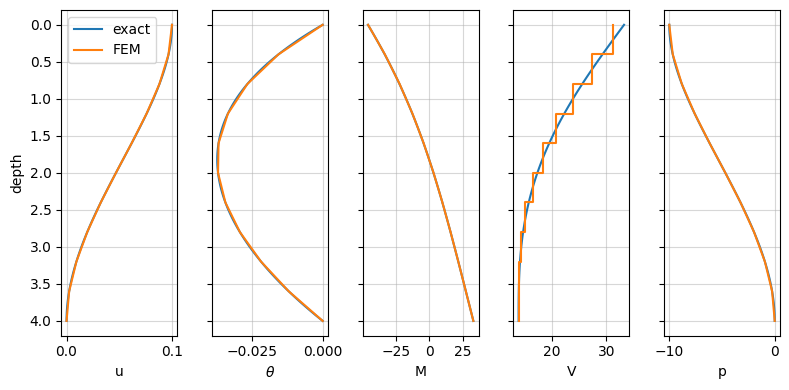

In [206]:
# Define boundary conditions
BCs = np.asarray([
    [0,0.1,1],
    [1,0.0,1],
    [0,0.0,Nele+1],
    [1,0.0,Nele+1]    
])

BCs = np.asarray([
    [3,33.2510024267067,1],
    [2,45.4483024248866,1],
    [0,0.0,Nele+1],
    [1,0.0,Nele+1]    
])

# Create force boundary condition array
F = np.zeros(2*(Nele+1))
for bc in BCs:
    if(bc[0] == 3):
        F[int(2*(bc[2]-1))] = bc[1]
    elif(bc[0] == 2):
        F[int(2*(bc[2]-1)+1)] = bc[1]

# Create displacement boundary condition array
u2 = np.zeros(2*(Nele+1))
for bc in BCs:
    if(bc[0] == 0):
        u2[int(2*(bc[2]-1))] = bc[1]
    elif(bc[0] == 1):
        u2[int(2*(bc[2]-1)+1)] = bc[1]

# Now impose essential BC's by condensing matrix, and solve for unknown displacements
F = F - Kglobal@u2  # compute forces caused by essential boundary conditions
mask = np.full(2*(Nele+1),True)
for bc in BCs:
    if(bc[0]==0):
        mask[int(2*(bc[2]-1))] = False
    elif(bc[0]==1):
        mask[int(2*(bc[2]-1)+1)] = False
u_new = np.linalg.solve(Kglobal[mask].T[mask].T,F[mask])

# assemble the new displacements into the overall displacement array
u2[mask] = u_new

# assemble internal forces based on individual element stiffness matrices
F_beam = np.zeros(4*Nele)
F_py = np.zeros(4*Nele)
I = 0
for i in range(Nele):
    Kbeam = get_Kbeam(EI,dx2)
    F_beam[2*I:2*I+4] = Kbeam@u2[I:I+4]
    Kpy = get_Kpy(kyi,dx2)
    F_py[2*I:2*I+4] = Kpy@u2[I:I+4]
    I+=2
fig, ax = plt.subplots(ncols=5,sharey='row',figsize=(8,4))
ax[0].plot(u,x,label='exact')
ax[0].plot(u2[0::2],x2,label='FEM')
ax[1].plot(theta,x)
ax[1].plot(u2[1::2],x2)
ax[2].plot(M,x)
ax[2].plot(F_beam[1::2]*-ele_sign,x2_ele)
ax[3].plot(V,x)
ax[3].plot(F_beam[0::2]*ele_sign,x2_ele)
ax[4].plot(p,x)
ax[4].plot(-2*F_py[0::2]/dx2,x2_ele)
ax[0].legend()
ax[0].invert_yaxis()
ax[0].set_ylabel('depth')
ax[0].set_xlabel('u')
ax[1].set_xlabel(r'$\theta$')
ax[2].set_xlabel('M')
ax[3].set_xlabel('V')
ax[4].set_xlabel('p')
for a in ax:
    a.grid(True, alpha=0.5)
plt.tight_layout()

## A few comments

You might notice that the shear distribution is piece-wise constant, with discontinuities at the node locations. The reason for this behavior is that the Winkler stiffness intensity is lumped at the nodes, and no forces act on the beam elements in between the nodes. This is an outcome of using Hermite cubic polynomial shape functions, which have zero pressures acting on the beam between the nodes. Furthermore, the shear at the top of the beam is less than the exact solution. That's because when a displacement is imposed on top of the beam, some of the force goes into the beam element and some goes into the Winkler spring. The orange line above represents the shear in the beam. These differences become smaller when more elements are utilized.

## Solution with vertically variable $k_y^i$

The solution above has an analytical solution, which is nice because we can validate the finite element implementation against a known solution. However, we would never need the finite element method if every problem was so simple. The script below develops a solution for a vertically variable Winkler stiffness intensity. We adopt the form utilized by [Brandenberg et al (2020)](https://ascelibrary.org/doi/10.1061/%28ASCE%29GT.1943-5606.0002374):  

$k_y^i\left(z\right) = k_{yH}^i\left[b+\left(1+b\right)\frac{z}{H}\right]^{2n}$  

where $k_{yH}^i$ = Winkler stiffness intensity at the bottom of the beam, $b$ and $n$ are model coefficients that control the shape of the variation of $k_y^i$ with depth, and $H$ is the length of the beam. For static conditions, a rigid wall, and an infinitely long soil deposit, the value of $k_{yH}^i is given by:  

$k_{yH}^i = \frac{G_H}{H}\frac{2}{\sqrt{\left(1-\nu\right)\left(2-\nu\right)}}\left(1.06 e^{-1.97\left(1-2n\right)-3.01b}+\frac{\pi}{2}\right)$  

We adopt the following parameters:

$G_H = \rho V_S^2$  
$\rho$ = 2.0 $Mg/m^3$  
$V_{SH}$ = 200 m/s  
$b$ = 0.1  
$n$ = 0.25  



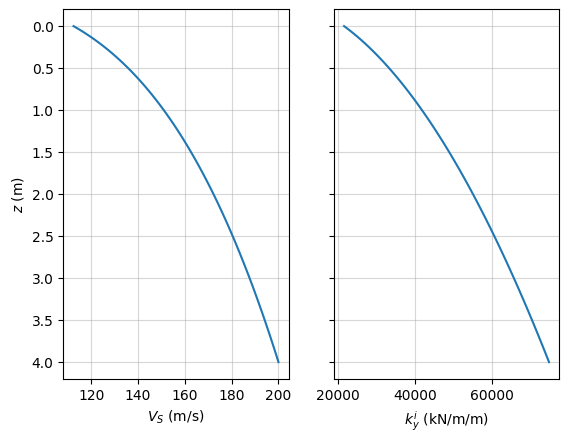

In [218]:
import numpy as np
import matplotlib.pyplot as plt

def get_kyi(kyiH,b,z,H,n):
    return kyiH*(b+(1+b)*z/H)**(2*n)

rho = 2.0
VsH = 200
GH = rho*VsH**2
b = 0.1
n = 0.25
nu = 0.3
kyiH = GH/H*2/np.sqrt((1-nu)*(2-nu))*(1.06*np.exp(-1.97*(1-2*n)-3.01*b)+np.pi/2)
Vs = VsH*(b+(1-b)*x/H)**n
kyi = get_kyi(kyiH,b,x,H,n)

fig, ax = plt.subplots(ncols=2, sharey='row')
ax[0].plot(Vs,x)
ax[1].plot(kyi,x)
ax[0].invert_yaxis()
ax[0].set_ylabel(r'$z$ (m)')
ax[0].set_xlabel(r'$V_S$ (m/s)')
ax[1].set_xlabel(r'$k_y^i$ (kN/m/m)')
for a in ax:
    a.grid(True,alpha=0.5)

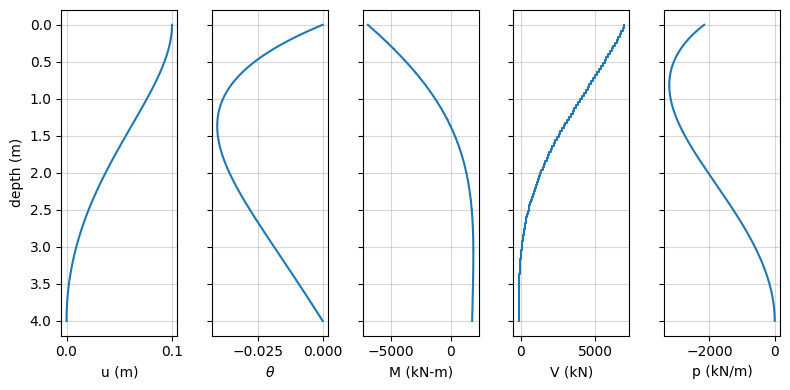

In [225]:
Nele = 100                        # Number of beam elements
H = 4.0                           # Total length of beam
EI = 100000                       # Flexural stiffness of beam
dx2 = H/Nele                      # Element length
x2 = np.linspace(0,H,Nele+1)      # Array of nodal locations
x2_ele = np.zeros(2*Nele)
x2_ele[0::2] = x2[0:Nele]
x2_ele[1::2] = x2[1:Nele+1]
ele_sign = np.zeros(2*Nele)
ele_sign[0::2] = 1
ele_sign[1::2] = -1

# We now have to define the stiffness matrix for variable kyi
def get_Kpy_variable(kyiH,b,z1,z2,H,n):
    kyi1 = get_kyi(kyiH,b,z1,H,n)
    kyi2 = get_kyi(kyiH,b,z2,H,n)
    dz = np.abs(z2-z1)
    Kpy = dz/2.0*np.asarray([
        [kyi1, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, kyi2, 0.0],
        [0.0, 0.0, 0.0, 0.0]
    ])
    return Kpy

# Define global force vector
Kglobal = np.zeros((2*(Nele+1),2*(Nele+1)))  
I = 0
for k in range(Nele):
    Kbeam = get_Kbeam(EI,dx2)
    Kpy = get_Kpy_variable(kyiH,b,x2_ele[2*k],x2_ele[2*k+1],H,n)
    Kele = Kbeam + Kpy
    for i in range(4):
        for j in range(4):
            Kglobal[i+I][j+I] += Kele[i][j]
    I+=2

# Define boundary conditions
BCs = np.asarray([
    [0,0.1,1],
    [1,0.0,1],
    [0,0.0,Nele+1],
    [1,0.0,Nele+1]    
])

# Create force boundary condition array
F = np.zeros(2*(Nele+1))
for bc in BCs:
    if(bc[0] == 3):
        F[int(2*(bc[2]-1))] = bc[1]
    elif(bc[0] == 2):
        F[int(2*(bc[2]-1)+1)] = bc[1]

# Create displacement boundary condition array
u2 = np.zeros(2*(Nele+1))
for bc in BCs:
    if(bc[0] == 0):
        u2[int(2*(bc[2]-1))] = bc[1]
    elif(bc[0] == 1):
        u2[int(2*(bc[2]-1)+1)] = bc[1]

# Now impose essential BC's by condensing matrix, and solve for unknown displacements
F = F - Kglobal@u2  # compute forces caused by essential boundary conditions
mask = np.full(2*(Nele+1),True)
for bc in BCs:
    if(bc[0]==0):
        mask[int(2*(bc[2]-1))] = False
    elif(bc[0]==1):
        mask[int(2*(bc[2]-1)+1)] = False
u_new = np.linalg.solve(Kglobal[mask].T[mask].T,F[mask])

# assemble the new displacements into the overall displacement array
u2[mask] = u_new

# assemble internal forces based on individual element stiffness matrices
F_beam = np.zeros(4*Nele)
F_py = np.zeros(4*Nele)
I = 0
for i in range(Nele):
    Kbeam = get_Kbeam(EI,dx2)
    F_beam[2*I:2*I+4] = Kbeam@u2[I:I+4]
    Kpy = get_Kpy_variable(kyiH,b,x2_ele[2*i],x2_ele[2*i+1],H,n)
    F_py[2*I:2*I+4] = Kpy@u2[I:I+4]
    I+=2
fig, ax = plt.subplots(ncols=5,sharey='row',figsize=(8,4))
ax[0].plot(u2[0::2],x2)
ax[1].plot(u2[1::2],x2)
ax[2].plot(F_beam[1::2]*-ele_sign,x2_ele)
ax[3].plot(F_beam[0::2]*ele_sign,x2_ele)
ax[4].plot(-2*F_py[0::2]/dx2,x2_ele)
ax[0].invert_yaxis()
ax[0].set_ylabel('depth (m)')
ax[0].set_xlabel('u (m)')
ax[1].set_xlabel(r'$\theta$')
ax[2].set_xlabel('M (kN-m)')
ax[3].set_xlabel('V (kN)')
ax[4].set_xlabel('p (kN/m)')
for a in ax:
    a.grid(True, alpha=0.5)
plt.tight_layout()